# F0753 範例程式 - 第 11 章 多元線性迴歸分析：scikit-learn

## 11-0 使用 scikit-learn 並匯入測試資料集

### *取出自變數與應變數資料*

In [1]:
from sklearn import datasets

data = datasets.load_boston().data
target = datasets.load_boston().target

print(data)
print(target)

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


注意：Scikit-learn 自 1.2 版起將不再內建波士頓房價資料集，若你安裝了新版 Anaconda，執行以上程式可能會看到警告或產生錯誤。若遇到此種情況，請改執行下面的替代程式碼：

In [4]:
import pandas as pd

datasets = pd.read_csv('https://github.com/selva86/datasets/raw/master/BostonHousing.csv')
data = datasets.drop(['medv'], axis=1).to_numpy()
target = datasets['medv'].to_numpy()

print(data)
print(target)

datasets.describe()

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### *資料分割：訓練資料集與測試資料集*

In [5]:
# 沿用上一小節的模組及 data/target

from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2)

In [6]:
print(data_train.shape)
print(data_test.shape)
print(target_train.shape)
print(target_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


## 11-1 訓練並評估多元線性迴歸模型

### *使用訓練集產生模型*

In [10]:
# 沿用上一小節的模組及 data_train, data_test, target_train

from sklearn.linear_model import LinearRegression

regr_model = LinearRegression()
regr_model.fit(data_train, target_train)


LinearRegression()

In [11]:
predictions = regr_model.predict(data_test)

print(predictions.round(3))
print(target_test)

[21.487 22.299 21.807 20.367  6.379 32.362 20.289 26.31  30.735 23.903
 16.679 22.371  6.865 20.564 18.129 25.854 31.518 22.015 21.284 28.568
 23.52  35.721  6.599 15.654 18.6   18.867 34.376 27.772 20.205 23.966
 32.847 34.846 39.234 35.773 16.927 36.072 17.311 21.028 13.939 22.548
 15.642 19.069 24.488 25.384 28.016 26.462 23.363 31.253 13.613 25.106
 23.575 25.116 15.917 17.818 25.453  8.826 27.356 18.765 17.798 29.065
 14.513 24.441 27.107 20.206 18.599 18.439 19.534 21.743 20.331 27.509
 22.945 19.632 20.516 16.858 19.682 20.233 15.527 32.674 15.056 17.96
 26.272 13.203 19.044 26.923 30.743 16.102 28.32  13.041 28.204 34.052
 14.577 38.216 36.433 19.546 19.333 29.125 21.67  12.783 34.485 30.58
 34.49  22.432]
[21.  21.4 18.7 24.1  8.8 29.  21.4 24.8 25.1 21.9 17.5 22.2 10.2 18.3
 22.5 23.9 32.2 21.7 21.2 22.8 21.  38.7 10.5 21.9 19.8 19.5 31.  25.
 17.1 19.1 33.1 39.8 43.5 33.4 17.2 50.  23.1 20.4 14.3 20.3 14.1 22.6
 22.7 24.2 26.6 22.8 24.7 32.5 11.3 21.6 22.4 21.4 15.6 17.8 23.

## 11-2 評估模型的表現 (performance)

### *評估模型表現 1：決定係數*

In [12]:
# 沿用上一小節的模組及 regr_model, data_train, data_test, target_train, target_test

print(regr_model.score(data_train, target_train).round(3))
print(regr_model.score(data_test, target_test).round(3))

0.731
0.786


### *評估模型表現 2：殘差圖*

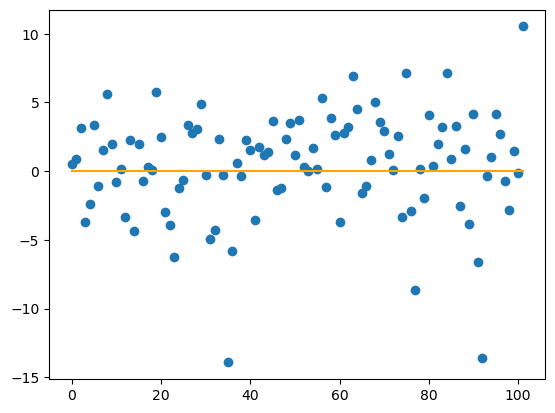

In [13]:
# 沿用上一節的 predictions/target_test

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(predictions.size)
y = x * 0

plt.scatter(x, predictions - target_test)
plt.plot(x, y, color='orange')
plt.show()

### *評估模型表現 3：平均絕對誤差*

In [14]:
# 沿用上一節的 predictions/target_test

from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(target_test, predictions).round(3))

2.878


### *取得模型的係數*

In [15]:
# 沿用上一節的 regr_model

print(regr_model.coef_.round(2))
print(regr_model.intercept_.round(2))

[-1.000e-01  5.000e-02 -1.000e-02  3.180e+00 -1.846e+01  3.640e+00
 -0.000e+00 -1.530e+00  3.200e-01 -1.000e-02 -9.300e-01  1.000e-02
 -5.100e-01]
38.2


## 11-3 用真實世界的資料做迴歸分析：共享單車與天氣

CSV 下載位址：https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv

### *匯入資料集到 pandas 的 DataFrame*

In [16]:
import pandas as pd

df = pd.read_csv(r'C:\Users\CJCU-CC\Downloads\SeoulBikeData.csv', encoding='gbk', index_col=['Date'])
df

,Rented Bike Count,Hour,Temperature(癈),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(癈),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Date,,,,,,,,,,,,,
01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes


你也可以直接如下載入資料集：

In [17]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv', encoding='gbk', index_col=['Date'])
df

,Rented Bike Count,Hour,Temperature(癈),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(癈),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Date,,,,,,,,,,,,,
01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes


### *資料清理 (Data cleaning)*

In [18]:
# 沿用上一小節的模組及 df

data = df.copy()
data = data[data['Functioning Day'] == 'Yes']
data.pop('Functioning Day')

Date
01/12/2017    Yes
01/12/2017    Yes
01/12/2017    Yes
01/12/2017    Yes
01/12/2017    Yes
             ... 
30/11/2018    Yes
30/11/2018    Yes
30/11/2018    Yes
30/11/2018    Yes
30/11/2018    Yes
Name: Functioning Day, Length: 8465, dtype: object

In [19]:
data = data.rename(columns={'Temperature(癈)': 'Temperature(*C)', 'Dew point temperature(癈)': 'Dew point(*C)'})

### *將文字的資料『編碼』為數字*

In [20]:
# 沿用上一小節的模組及 data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['Seasons'] = le.fit_transform(data['Seasons'])
data['Holiday'] = le.fit_transform(data['Holiday'])

data[['Seasons', 'Holiday']]

,Seasons,Holiday
Date,,
01/12/2017,3,1
01/12/2017,3,1
01/12/2017,3,1
01/12/2017,3,1
01/12/2017,3,1
...,...,...
30/11/2018,0,1
30/11/2018,0,1
30/11/2018,0,1


### *抽出目標值*

In [21]:
# 沿用上一小節的模組及 data

target = data.pop('Rented Bike Count')

### *開始訓練迴歸模型*

In [ ]:
# 沿用上一小節的模組及 data

data_train, data_test, target_train, target_test = train_test_split(data.values, target.values, test_size=0.2)

regr = LinearRegression()
regr.fit(data_train, target_train)
predictions = regr.predict(data_test)

### *評估預測成果*

In [ ]:
# 沿用上一小節的模組及 regr, data_train, data_test, target_train, target_test

print(regr.score(data_train, target_train).round(3))
print(regr.score(data_test, target_test).round(3))